## Investigate runs done on hyperparameter tuning while training diffusion LMs

In [3]:
import torch
import os
import matplotlib.pyplot as plt
import seaborn as sns
import lib.datasets

In [4]:
# load tokenizer
owt2_tokenizer = lib.datasets.openwebtext2_tokenizer()
voc_list = [owt2_tokenizer.id_to_token(i) for i in range(owt2_tokenizer.get_vocab_size())]

In [26]:
def disp_embedding_summary(file):
    mat = torch.load(file, map_location=torch.device('cpu'))["matrix"]
    print(mat.mean(), mat.std())
    mat_n = mat / mat.norm(dim=-1, keepdim=True)
    print("unwhitened mean cos similar",(mat_n @ mat_n.T).mean())
    whitened_mat_n = (mat_n - mat_n.mean(axis=0, keepdim=True)) / mat_n.std(axis=0, keepdim=True)

    whitened_mat_n_n = whitened_mat_n / whitened_mat_n.norm(dim=-1, keepdim=True)
    print("whitened mean inner product", (whitened_mat_n @ whitened_mat_n.T).mean())
    print("covariance between the variables", whitened_mat_n.T @ whitened_mat_n / (whitened_mat_n.shape[0]-1))
    plt.figure()
    plt.imshow(whitened_mat_n.T @ whitened_mat_n / (whitened_mat_n.shape[0]-1))
    plt.show()
    U, S, V = torch.svd(whitened_mat_n.T @ whitened_mat_n)
    print("singular vals of covariance * (n - 1)", S)
    print("singular vals of covariance * (n - 1)", S / S.sum())
    print("whitened norm inner product", (whitened_mat_n_n @ whitened_mat_n_n.T).mean())
    print(mat_n[:10,:8])
    U, S, V = torch.svd(whitened_mat_n)
    # U.shape, S.shape, V.shape
    # pca_dots = U[:, :2] @ torch.diag(S[:2]) @ V[:2, :]
    dots = U[:, :2] @ torch.diag(S[:2]) # @ V[:2, :]
    # dots = dots[torch.randperm(dots.shape[0])[:10000]]
    # plt.scatter(dots[:, 0], dots[:, 1])
    # seaborn used with opacity to see density
    # sns.scatterplot(x=dots[:, 0], y=dots[:, 1], alpha=0.1)
    # for a random subset of 20 points plot their word on the 2d plane in their corresponding location
    markers = torch.randperm(dots.shape[0])[:20]
    plt.figure()
    plt.scatter(dots[:, 0], dots[:, 1], alpha=0.1)
    for i in markers:
        plt.text(dots[i, 0], dots[i, 1], voc_list[i], fontsize=12)
    plt.show()
    return mat

tensor(0.1097) tensor(1.6240)
unwhitened mean cos similar tensor(0.0703)
whitened mean inner product tensor(1.0277e-10)
covariance between the variables tensor([[ 1.0000,  0.0383, -0.2288,  0.3167, -0.3309, -0.3475,  0.0499,  0.0678,
          0.1066, -0.3988, -0.0857, -0.0845,  0.2320, -0.0558, -0.0614,  0.0309],
        [ 0.0383,  1.0000,  0.0271,  0.2304,  0.2788,  0.3046,  0.2137, -0.0676,
          0.1192,  0.2321, -0.0717, -0.5868, -0.1598, -0.0728, -0.2079,  0.1080],
        [-0.2288,  0.0271,  1.0000, -0.4603, -0.0423, -0.0487, -0.0682, -0.1495,
         -0.4632,  0.2241,  0.3169,  0.0140, -0.1962, -0.5834,  0.0309, -0.4303],
        [ 0.3167,  0.2304, -0.4603,  1.0000,  0.2227, -0.4038,  0.3859, -0.0204,
          0.3316, -0.2899, -0.1425, -0.0646, -0.1876,  0.0485, -0.0474, -0.0064],
        [-0.3309,  0.2788, -0.0423,  0.2227,  1.0000,  0.0864,  0.5108,  0.1125,
          0.0115,  0.1356,  0.2721, -0.1525,  0.1486,  0.3229, -0.0828,  0.3506],
        [-0.3475,  0.3046, -0.04

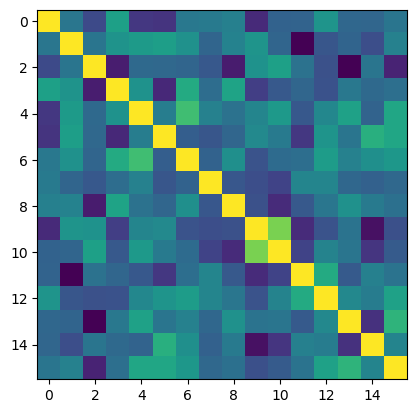

singular vals of covariance * (n - 1) tensor([99476.6797, 85798.4375, 67616.7656, 57909.3008, 49311.7227, 38592.9062,
        37590.7969, 25869.9941, 21174.9551, 17400.3359, 10409.6152,  9504.6807,
         2885.9387,   278.7828,   237.1431,   214.0207])
singular vals of covariance * (n - 1) tensor([0.1897, 0.1637, 0.1290, 0.1105, 0.0941, 0.0736, 0.0717, 0.0493, 0.0404,
        0.0332, 0.0199, 0.0181, 0.0055, 0.0005, 0.0005, 0.0004])
whitened norm inner product tensor(0.0007)
tensor([[-2.5988e-01,  1.5866e-01,  4.0102e-01,  1.0806e-01,  5.7285e-01,
          2.3706e-01, -2.3706e-01, -8.2113e-02],
        [-2.4308e-01, -9.7226e-02, -1.6074e-01,  1.3185e-01, -1.2567e-01,
         -2.8443e-01,  5.1031e-01,  3.6983e-02],
        [-1.3133e-01, -1.1246e-01, -1.1605e-01, -1.3837e-02, -1.7909e-01,
         -3.7956e-01,  6.0446e-01,  7.9957e-02],
        [-3.8367e-01,  7.6720e-02, -4.8803e-01,  4.4810e-02, -2.4603e-01,
          7.0349e-02, -8.4979e-02, -8.7536e-02],
        [-4.7833e-01,  1.88

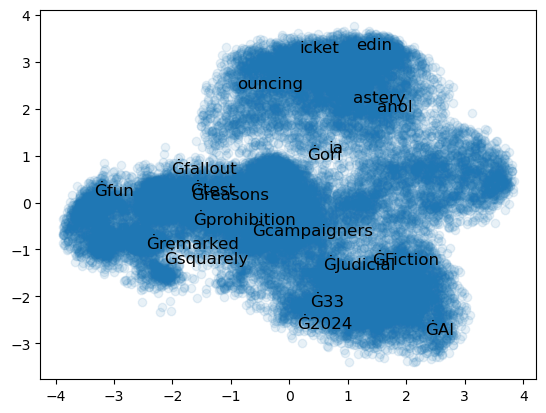

tensor([[-1.8172,  1.1094,  2.8041,  ..., -2.3245,  1.2988,  1.1801],
        [-1.6485, -0.6594, -1.0901,  ..., -2.3059,  0.4715,  2.0165],
        [-0.9357, -0.8013, -0.8269,  ..., -1.8546,  0.6337,  1.4682],
        ...,
        [ 1.6220, -0.6525, -1.7281,  ..., -1.0239,  1.2016,  0.1594],
        [-0.5783,  2.6257,  2.1485,  ..., -1.7513,  0.4962, -2.4619],
        [ 4.1528, -0.5886,  0.0927,  ..., -1.7786,  0.8178, -1.3320]])

In [27]:
disp_embedding_summary('./diffusion_hype_model_saves/BoW_embedding_pred_x0_logits_direct_primary_double_logit_reg_rconstw=0_g=0/embedding_matrix.pt')

tensor(0.2376) tensor(1.5864)
unwhitened mean cos similar tensor(0.3473)
whitened mean inner product tensor(7.5488e-11)
covariance between the variables tensor([[ 1.0000, -0.2236, -0.0321, -0.9387,  0.0317, -0.7120,  0.5317, -0.3001,
         -0.4268, -0.5744,  0.0612, -0.6776,  0.1545,  0.8356,  0.4880,  0.3507],
        [-0.2236,  1.0000, -0.6414,  0.2452, -0.0997, -0.1478, -0.4489,  0.5107,
         -0.0613,  0.3322, -0.0569,  0.6421,  0.3092, -0.2325, -0.3596,  0.1513],
        [-0.0321, -0.6414,  1.0000,  0.0353, -0.1039,  0.3965,  0.2093, -0.2409,
          0.6966, -0.0247,  0.1762, -0.3814, -0.7038,  0.1955,  0.1634, -0.0359],
        [-0.9387,  0.2452,  0.0353,  1.0000,  0.1235,  0.6600, -0.4093,  0.3056,
          0.5199,  0.5166, -0.1368,  0.6547, -0.1640, -0.8582, -0.4235, -0.1619],
        [ 0.0317, -0.0997, -0.1039,  0.1235,  1.0000, -0.1833,  0.2954, -0.0362,
         -0.1946,  0.0174, -0.0453,  0.0566,  0.2015, -0.0657,  0.3033,  0.2707],
        [-0.7120, -0.1478,  0.39

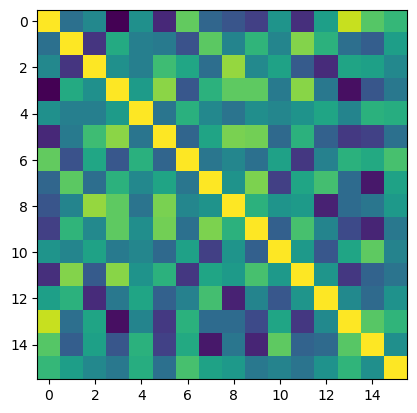

singular vals of covariance * (n - 1) tensor([185263.2344, 109599.8750,  66455.8984,  47703.0234,  41937.6250,
         21674.1699,  18453.1465,  11606.8506,  10464.2051,   4826.9326,
          2507.0142,   1724.3225,    858.7418,    568.5433,    391.2283,
           237.1800])
singular vals of covariance * (n - 1) tensor([0.3534, 0.2091, 0.1268, 0.0910, 0.0800, 0.0413, 0.0352, 0.0221, 0.0200,
        0.0092, 0.0048, 0.0033, 0.0016, 0.0011, 0.0007, 0.0005])
whitened norm inner product tensor(0.0060)
tensor([[ 0.3118, -0.1506, -0.2561,  0.2013, -0.0107, -0.3550, -0.1335,  0.0095],
        [-0.3208, -0.0740, -0.0548,  0.1814, -0.1659, -0.3759, -0.0556,  0.0286],
        [-0.2587, -0.2647, -0.2048,  0.0459, -0.4253, -0.2327, -0.0991, -0.1727],
        [-0.1322, -0.5336,  0.0302,  0.1828,  0.2048, -0.2853,  0.2405, -0.4157],
        [-0.0717, -0.5693,  0.0703,  0.2249,  0.3662, -0.2443,  0.3901, -0.3748],
        [ 0.1125, -0.3620,  0.1083,  0.0854,  0.5235, -0.0526,  0.6093, -0.0159],
   

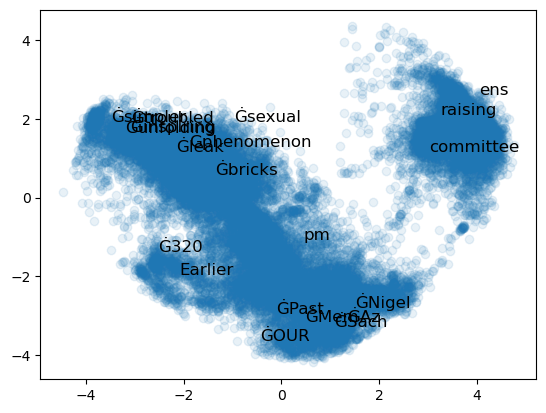

In [28]:
disp_embedding_summary("./diffusion_hype_model_saves/token_small_plaid/embedding_matrix.pt");
# nll 4

tensor(-0.3195) tensor(1.3083)
tensor(0.6938)
tensor([[ 0.2125, -0.1225, -0.0105, -0.1640, -0.2039, -0.1372,  0.0234,  0.1037],
        [ 0.2984, -0.2558, -0.3917, -0.3620,  0.0773, -0.1021,  0.0775, -0.0681],
        [ 0.2539,  0.1795, -0.0122, -0.2688, -0.1339, -0.4862, -0.0867,  0.3151],
        [ 0.0162,  0.1495, -0.0641,  0.0181, -0.6105, -0.3470,  0.1058, -0.1519],
        [-0.0019,  0.0310, -0.0473,  0.2690, -0.4771, -0.2765,  0.1566, -0.1909],
        [ 0.2804, -0.0701,  0.4352,  0.4607, -0.0358, -0.0595,  0.1123, -0.1974],
        [ 0.1976,  0.0650,  0.0167,  0.0671, -0.5099, -0.2696, -0.0126, -0.3704],
        [ 0.4714,  0.2258, -0.1098, -0.1991, -0.2046, -0.1810, -0.0660, -0.1600],
        [ 0.0423, -0.0241, -0.1139,  0.1285, -0.4381, -0.3432,  0.0526, -0.0961],
        [ 0.5877, -0.0136,  0.0691,  0.0211,  0.0087, -0.0845, -0.1612, -0.2532]])


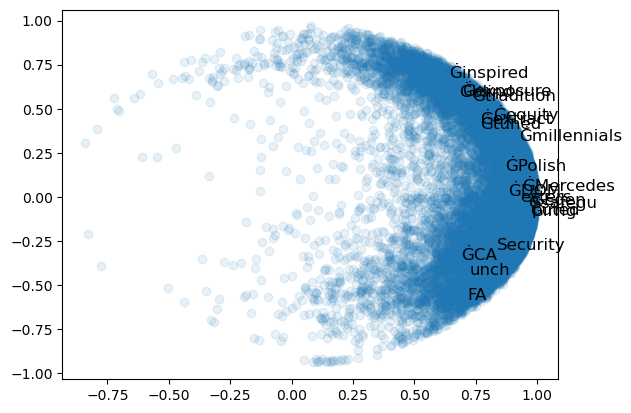

In [6]:
# train.py --steps=92000 --steps_max_for_lr_sched=92000 --diffusion_mode=BoW_embedding_reconst_first --grad_accum_steps=2 --batch_size=128 --model_save_path=testhypr_lr=0.0014_embeddim=16_wd=4e-05_g=0.0_rconstw=0.7_v2 --lr=0.0014 --embed_dim=16 --weight_decay=4e-05 --BoW_cumsum_gamma=0.0 --reconst_weight=0.7 --lr_scheduler=cosine
# achieved nll of 7.11 on train and 7.34595818919893 on validation.
# critically this was NOT an LM reimplementation but just a plaid retrying with reconst first.

mat = torch.load("./diffusion_hype_model_saves/testhypr_lr=0.0014_embeddim=16_wd=4e-05_g=0.0_rconstw=0.7_v2/embedding_matrix.pt", map_location=torch.device('cpu'))["matrix"]
print(mat.mean(), mat.std())
mat = mat / mat.norm(p=2, dim=-1, keepdim=True)
print((mat @ mat.T).mean())
print(mat[:10,:8])
U, S, V = torch.svd(mat)
# U.shape, S.shape, V.shape
dots = U[:, :2] @ torch.diag(S[:2]) # @ V[:2, :]
# dots = dots[torch.randperm(dots.shape[0])[:10000]]
# plt.scatter(dots[:, 0], dots[:, 1])
# seaborn used with opacity to see density
markers = torch.randperm(dots.shape[0])[:20]
plt.scatter(dots[:, 0], dots[:, 1], alpha=0.1)
for i in markers:
    plt.text(dots[i, 0], dots[i, 1], voc_list[i], fontsize=12)
plt.show()
# sns.scatterplot(x=dots[:, 0], y=dots[:, 1], alpha=0.1)

tensor(0.0443) tensor(1.7064)
tensor(0.4453)
tensor([[ 0.1617,  0.0161,  0.0541,  0.2282,  0.1581,  0.3107,  0.0497,  0.2253],
        [ 0.1947, -0.0767, -0.0758, -0.1521,  0.2115,  0.1426,  0.0652,  0.1549],
        [-0.3667,  0.0552,  0.0297,  0.3988, -0.0349,  0.0993,  0.0921, -0.0303],
        [ 0.1643,  0.2642, -0.1913, -0.0084, -0.0764,  0.0412, -0.0184, -0.0050],
        [ 0.3276,  0.2654, -0.1457,  0.0779,  0.1461, -0.0418, -0.2178, -0.0215],
        [ 0.1569,  0.2162, -0.0556, -0.1019,  0.4080, -0.1620, -0.2617,  0.2109],
        [ 0.1146,  0.0855, -0.0627, -0.2064,  0.1658, -0.0866,  0.1755,  0.0565],
        [-0.1621, -0.0237,  0.3161,  0.2184,  0.0722, -0.1154,  0.2861, -0.0886],
        [ 0.0295,  0.2750,  0.0006,  0.2378,  0.0702,  0.0007,  0.0664, -0.0131],
        [ 0.0047,  0.2589,  0.3528, -0.0133,  0.4593, -0.0804,  0.1753,  0.0683]])


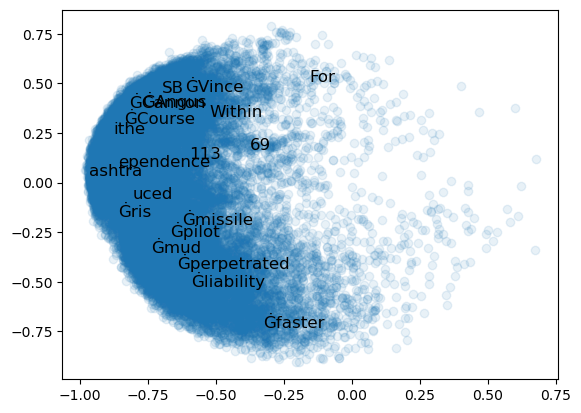

In [7]:
# train.py --grad_accum_steps=2 --batch_size=128 --model_save_path=BoW_embedding_double_logit_reg_test --hook_freq=5000 --diffusion_mode=BoW_embedding_double_logit_reg --BoW_cumsum_gamma=0.0
# achieved nll2(plaid with logits first) 6.908 and nll of 7.09 on train and 7.08 on validation.
# here we used plaid logit first prediction as a regularizer
# note the SIGNIFICANT DROP in mean inner product! more similar to the plaid embeddings!

mat = torch.load("./BoW_embedding_double_logit_reg_test/embedding_matrix.pt", map_location=torch.device('cpu'))["matrix"]
print(mat.mean(), mat.std())
mat = mat / mat.norm(p=2, dim=-1, keepdim=True)
print((mat @ mat.T).mean())
print(mat[:10,:8])
U, S, V = torch.svd(mat)
# U.shape, S.shape, V.shape
dots = U[:, :2] @ torch.diag(S[:2]) # @ V[:2, :]
# dots = dots[torch.randperm(dots.shape[0])[:10000]]
# plt.scatter(dots[:, 0], dots[:, 1])
# seaborn used with opacity to see density
markers = torch.randperm(dots.shape[0])[:20]
plt.scatter(dots[:, 0], dots[:, 1], alpha=0.1)
for i in markers:
    plt.text(dots[i, 0], dots[i, 1], voc_list[i], fontsize=12)
plt.show()
# sns.scatterplot(x=dots[:, 0], y=dots[:, 1], alpha=0.1)

tensor(0.1012) tensor(1.4434)
tensor(0.0626)
tensor([[ 0.4325, -0.0618,  0.4248,  0.3412, -0.1712,  0.1031,  0.3418,  0.3279],
        [-0.1256, -0.0640,  0.0024, -0.3292, -0.2933,  0.1002,  0.1218, -0.0006],
        [ 0.0369,  0.1827, -0.2101, -0.3036, -0.4820, -0.1223, -0.1702,  0.1496],
        [-0.4205,  0.1399, -0.0927, -0.3221, -0.3348, -0.1133,  0.1867,  0.1444],
        [-0.4101,  0.0869,  0.0452, -0.1048, -0.2136, -0.1987,  0.2378,  0.0949],
        [-0.1996,  0.3506, -0.0328, -0.1070,  0.0540, -0.3973,  0.3074, -0.4002],
        [-0.2847, -0.2253,  0.0972, -0.1332, -0.1048, -0.1475, -0.0317,  0.2589],
        [-0.0338, -0.0936, -0.0763, -0.4248, -0.0282,  0.0540, -0.1590, -0.1767],
        [ 0.0820,  0.2594, -0.3063, -0.3269,  0.0113, -0.4131,  0.0293,  0.1193],
        [-0.0842,  0.2434, -0.0967, -0.1023, -0.3121, -0.3410,  0.3677, -0.1234]])


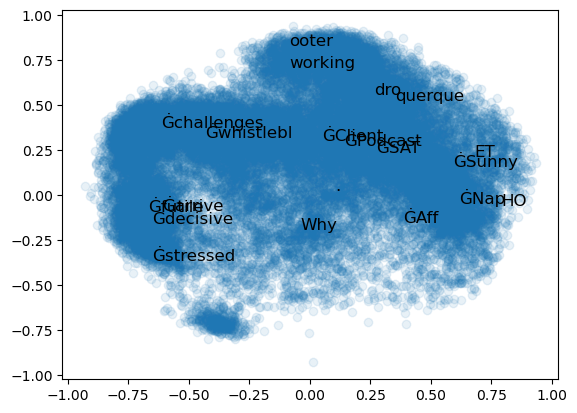

In [5]:
# python train.py --grad_accum_steps=4 --batch_size=64  --model_save_path="diffusion_hype_model_saves/BoW_embedding_pred_x0_logits_direct_primary_double_logit_reg_rconstw=0" --diffusion_mode=BoW_embedding_pred_x0_logits_direct_primary_double_logit_reg  --wandb_run_name="BoW_embedding_pred_x0_logits_direct_primary_double_logit_reg_rconstw=0" --reconst_secondary_weight=0 --BoW_cumsum_gamma=0 --lr_scheduler=cosine
# nll of 4.43 on train and 4.58 on validation.
# here we used plaid logit first prediction as a regularizer
# note the SIGNIFICANT DROP in mean inner product! more similar to the plaid embeddings!

mat = torch.load("./diffusion_hype_model_saves/BoW_embedding_pred_x0_logits_direct_primary_double_logit_reg_rconstw=0/embedding_matrix.pt", map_location=torch.device('cpu'))["matrix"]
print(mat.mean(), mat.std())
mat = mat / mat.norm(p=2, dim=-1, keepdim=True)
print((mat @ mat.T).mean())
print(mat[:10,:8])
U, S, V = torch.svd(mat)
# U.shape, S.shape, V.shape
dots = U[:, :2] @ torch.diag(S[:2]) # @ V[:2, :]
# dots = dots[torch.randperm(dots.shape[0])[:10000]]
# plt.scatter(dots[:, 0], dots[:, 1])
# seaborn used with opacity to see density
markers = torch.randperm(dots.shape[0])[:20]
plt.scatter(dots[:, 0], dots[:, 1], alpha=0.1)
for i in markers:
    plt.text(dots[i, 0], dots[i, 1], voc_list[i], fontsize=12)
plt.show()
# sns.scatterplot(x=dots[:, 0], y=dots[:, 1], alpha=0.1)

tensor(-0.3202) tensor(1.6016)
tensor(0.6706)
tensor([[ 0.2365, -0.2233,  0.2642,  0.0191, -0.3380,  0.0987,  0.3504,  0.2862],
        [ 0.2355, -0.2248,  0.2645,  0.0205, -0.3358,  0.0997,  0.3535,  0.2846],
        [ 0.2389, -0.2263,  0.2635,  0.0190, -0.3373,  0.0989,  0.3512,  0.2843],
        [-0.1565,  0.4407,  0.4104, -0.0787, -0.1797,  0.0497,  0.0616,  0.3750],
        [-0.1318,  0.4030,  0.4031, -0.0816, -0.1955,  0.0519,  0.0814,  0.3722],
        [ 0.2270, -0.2106,  0.2722,  0.0167, -0.3372,  0.1020,  0.3471,  0.2933],
        [-0.0543,  0.3056,  0.4056, -0.0435, -0.2514,  0.0833,  0.1432,  0.3990],
        [ 0.2356, -0.2274,  0.2627,  0.0196, -0.3358,  0.0987,  0.3568,  0.2828],
        [ 0.2344, -0.2226,  0.2669,  0.0172, -0.3348,  0.0938,  0.3557,  0.2844],
        [ 0.2380, -0.2259,  0.2619,  0.0183, -0.3370,  0.0976,  0.3540,  0.2832]])


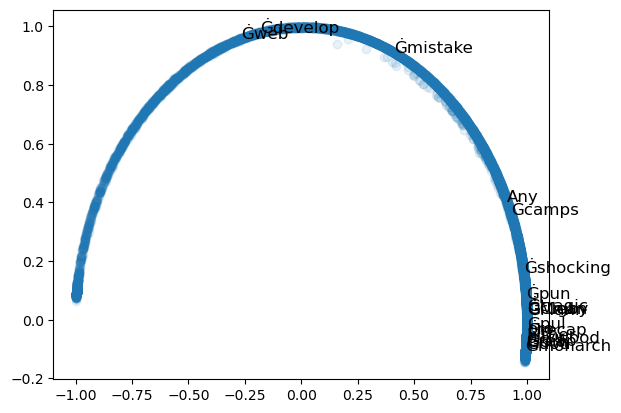

In [33]:
# train.py --grad_accum_steps=2 --batch_size=128 --model_save_path=hype_BoW_embedding_reconst_first_lr=0.0027_embeddim=16_wd=0.0015_g=0_rconstw=1.25_cosine --hook_freq=5000 --diffusion_mode=BoW_embedding_reconst_first_no_rescale_diff_lm_norms --BoW_cumsum_gamma=0.0 --reconst_weight=1.25 --lr=0.0027 --weight_decay=0.0015 --lr_scheduler=cosine
# achieved nll of 9.404 on train and 9.415 on validation.
# critically this WAS an LM reimplementation

mat = torch.load("./diffusion_hype_model_saves/hype_BoW_embedding_reconst_first_lr=0.0027_embeddim=16_wd=0.0015_g=0_rconstw=1.25_cosine/embedding_matrix.pt", map_location=torch.device('cpu'))["matrix"]
print(mat.mean(), mat.std())
mat = mat / mat.norm(p=2, dim=-1, keepdim=True)
print((mat @ mat.T).mean())
print(mat[:10,:8])
U, S, V = torch.svd(mat)
# U.shape, S.shape, V.shape
dots = U[:, :2] @ torch.diag(S[:2]) # @ V[:2, :]
# dots = dots[torch.randperm(dots.shape[0])[:10000]]
# plt.scatter(dots[:, 0], dots[:, 1])
# seaborn used with opacity to see density
# sns.scatterplot(x=dots[:, 0], y=dots[:, 1], alpha=0.1)
markers = torch.randperm(dots.shape[0])[:20]
plt.scatter(dots[:, 0], dots[:, 1], alpha=0.1)
for i in markers:
    plt.text(dots[i, 0], dots[i, 1], voc_list[i], fontsize=12)
plt.show()

tensor(0.1147) tensor(1.2663)
tensor(0.6560)
tensor([[ 0.3869,  0.2030, -0.0232,  0.0195,  0.1122, -0.1396, -0.4970, -0.0966],
        [ 0.3843,  0.2062, -0.0252,  0.0230,  0.1182, -0.1433, -0.4908, -0.0930],
        [ 0.3862,  0.2042, -0.0216,  0.0205,  0.1127, -0.1411, -0.4953, -0.0952],
        [ 0.0814,  0.3399, -0.1435,  0.2375,  0.2083, -0.2414, -0.0387,  0.2636],
        [ 0.1284,  0.3570, -0.1330,  0.2134,  0.2231, -0.2533, -0.0964,  0.2151],
        [ 0.3873,  0.1994, -0.0246,  0.0160,  0.1109, -0.1389, -0.5018, -0.1021],
        [ 0.1817,  0.3504, -0.1346,  0.1846,  0.2115, -0.2538, -0.1855,  0.1600],
        [ 0.3862,  0.2073, -0.0189,  0.0236,  0.1144, -0.1415, -0.4930, -0.0912],
        [ 0.3869,  0.2136, -0.0273,  0.0280,  0.1183, -0.1460, -0.4898, -0.0884],
        [ 0.3868,  0.2031, -0.0212,  0.0216,  0.1117, -0.1398, -0.4968, -0.0960]])


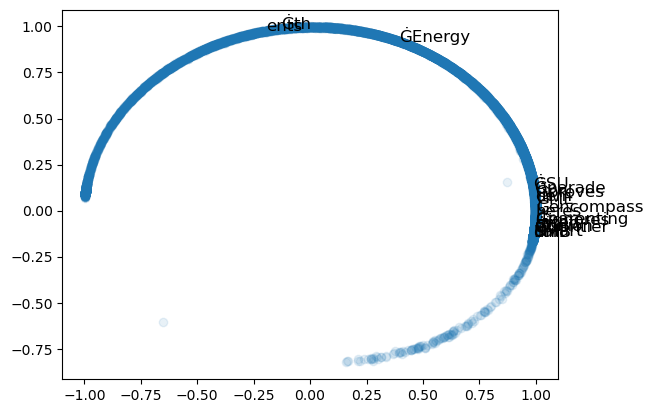

In [41]:
mat = torch.load("./diffusion_hype_model_saves/hype_BoW_embedding_reconst_first_lr=0.0027_embeddim=16_wd=0.0015_g=0_rconstw=1.25_v2/embedding_matrix.pt", map_location=torch.device('cpu'))["matrix"]
# same as above but
print(mat.mean(), mat.std())
mat = mat / mat.norm(p=2, dim=-1, keepdim=True)
print((mat @ mat.T).mean())
print(mat[:10,:8])
U, S, V = torch.svd(mat)
# U.shape, S.shape, V.shape
dots = U[:, :2] @ torch.diag(S[:2]) # @ V[:2, :]
# dots = dots[torch.randperm(dots.shape[0])[:10000]]
# plt.scatter(dots[:, 0], dots[:, 1])
# seaborn used with opacity to see density
# sns.scatterplot(x=dots[:, 0], y=dots[:, 1], alpha=0.1)
markers = torch.randperm(dots.shape[0])[:20]
plt.scatter(dots[:, 0], dots[:, 1], alpha=0.1)
for i in markers:
    plt.text(dots[i, 0], dots[i, 1], voc_list[i], fontsize=12)
plt.show()

tensor(0.3386) tensor(5.9027)


tensor(0.2311)
tensor([[-1.0801e-01,  3.3357e-01,  7.4903e-02, -2.8742e-01,  1.5477e-01,
          7.4440e-02, -4.2079e-02,  4.5621e-01],
        [-1.2028e-01, -3.3285e-02, -3.4862e-02, -1.6049e-01, -4.6928e-02,
          2.1005e-01, -1.1947e-01, -1.0026e-01],
        [-3.2883e-01,  9.2191e-03,  5.2963e-02, -5.5318e-01, -1.8416e-01,
          2.7279e-01,  1.3955e-01, -3.1929e-01],
        [-5.3000e-02, -2.9653e-02,  8.5240e-02, -1.6182e-01,  5.3585e-04,
          2.6048e-01, -5.6243e-03, -4.0286e-02],
        [-7.0990e-02,  5.7643e-02, -9.0772e-03,  2.8281e-01, -1.5094e-02,
         -6.4439e-01,  2.3823e-01,  9.8134e-02],
        [-7.8816e-02,  1.0445e-01,  2.5833e-01,  1.8663e-01,  1.6892e-01,
         -4.7631e-01,  1.6575e-01,  1.0531e-01],
        [-1.0112e-01, -1.3124e-01, -2.7539e-01,  2.4186e-01, -9.4670e-02,
         -7.4747e-01,  1.5673e-01,  1.5433e-01],
        [-3.2323e-01,  2.2146e-02,  3.4185e-02, -5.2951e-01, -1.9548e-01,
          2.1776e-01,  6.7910e-02, -4.2026e-01],
 

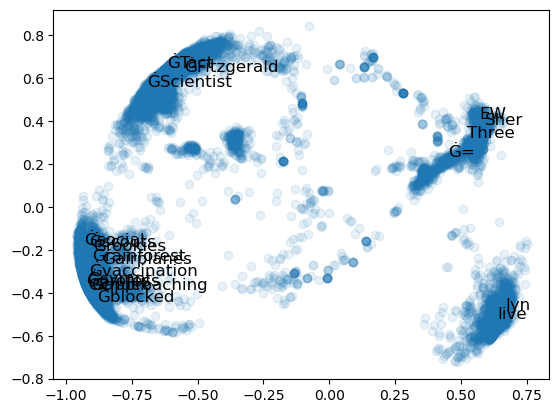

In [35]:
# the one billion size weight embedding matrix
mat = torch.load("/srv/flash2/jbjorner3/plaid-model/plaid1b_weights/embedding_matrix.pt", map_location=torch.device('cpu'))["matrix"]
print(mat.mean(), mat.std())
mat = mat / mat.norm(p=2, dim=-1, keepdim=True)
print((mat @ mat.T).mean())
print(mat[:10,:8])
U, S, V = torch.svd(mat)
# U.shape, S.shape, V.shape
dots = U[:, :2] @ torch.diag(S[:2]) # @ V[:2, :]
# dots = dots[torch.randperm(dots.shape[0])[:10000]]
# plt.scatter(dots[:, 0], dots[:, 1])
# seaborn used with opacity to see density
# sns.scatterplot(x=dots[:, 0], y=dots[:, 1], alpha=0.1)
markers = torch.randperm(dots.shape[0])[:20]
plt.scatter(dots[:, 0], dots[:, 1], alpha=0.1)
for i in markers:
    plt.text(dots[i, 0], dots[i, 1], voc_list[i], fontsize=12)
plt.show()

tensor(0.3386) tensor(5.9027)
unwhitened mean cos similar tensor(0.2311)
whitened mean inner product tensor(-1.0186e-10)
covariance between the variables tensor([[ 1.0000,  0.4177, -0.0471,  0.1680, -0.2531,  0.1277,  0.0499,  0.0777,
          0.3792,  0.3070,  0.4735,  0.0855,  0.0318, -0.0870,  0.0616, -0.2831],
        [ 0.4177,  1.0000, -0.6297, -0.0150, -0.5162, -0.0327, -0.2262, -0.2613,
          0.6297,  0.9328,  0.8410, -0.3607,  0.0339, -0.5377,  0.1551, -0.3552],
        [-0.0471, -0.6297,  1.0000, -0.4920,  0.9038,  0.6668, -0.3128, -0.2602,
         -0.7500, -0.6579, -0.4796,  0.8387,  0.5870,  0.9103,  0.4983,  0.7452],
        [ 0.1680, -0.0150, -0.4920,  1.0000, -0.7038, -0.8950,  0.8460,  0.4931,
          0.3365, -0.1104, -0.0049, -0.7234, -0.7939, -0.5711, -0.7350, -0.6655],
        [-0.2531, -0.5162,  0.9038, -0.7038,  1.0000,  0.7741, -0.6045, -0.3736,
         -0.7585, -0.4859, -0.4286,  0.8669,  0.7176,  0.9169,  0.7009,  0.9124],
        [ 0.1277, -0.0327,  0.6

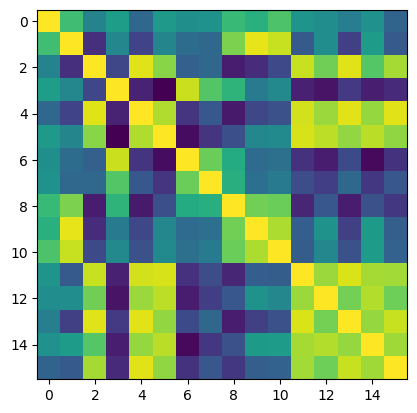

singular vals of covariance * (n - 1) tensor([2.8019e+05, 1.3111e+05, 3.9165e+04, 2.1208e+04, 1.5644e+04, 9.8393e+03,
        8.8284e+03, 8.0466e+03, 5.5254e+03, 2.8967e+03, 1.3540e+03, 4.3858e+02,
        9.4180e+00, 5.9351e+00, 2.5107e+00, 2.3497e+00])
singular vals of covariance * (n - 1) tensor([5.3444e-01, 2.5009e-01, 7.4703e-02, 4.0452e-02, 2.9840e-02, 1.8768e-02,
        1.6839e-02, 1.5348e-02, 1.0539e-02, 5.5253e-03, 2.5826e-03, 8.3655e-04,
        1.7964e-05, 1.1321e-05, 4.7890e-06, 4.4818e-06])
whitened norm inner product tensor(0.0154)
tensor([[-1.0801e-01,  3.3357e-01,  7.4903e-02, -2.8742e-01,  1.5477e-01,
          7.4440e-02, -4.2079e-02,  4.5621e-01],
        [-1.2028e-01, -3.3285e-02, -3.4862e-02, -1.6049e-01, -4.6928e-02,
          2.1005e-01, -1.1947e-01, -1.0026e-01],
        [-3.2883e-01,  9.2191e-03,  5.2963e-02, -5.5318e-01, -1.8416e-01,
          2.7279e-01,  1.3955e-01, -3.1929e-01],
        [-5.3000e-02, -2.9653e-02,  8.5240e-02, -1.6182e-01,  5.3585e-04,
    

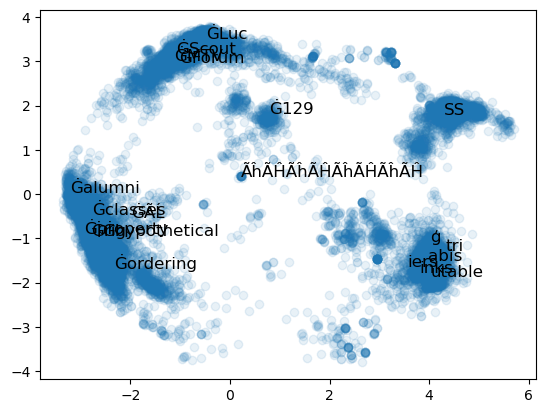

tensor([[ -3.0423,   9.3954,   2.1097,  ...,  -6.2136,   9.4356,  -9.6639],
        [ -3.1110,  -0.8609,  -0.9017,  ..., -14.0349, -17.6551,  -3.5395],
        [ -8.6144,   0.2415,   1.3875,  ...,  -3.1876, -12.1670,  -4.1059],
        ...,
        [ -1.6556, -12.1826,   4.5058,  ...,   9.9273,   2.6395,   5.2349],
        [ -0.7494,  -0.8915,   5.2025,  ...,  10.6569,  13.5164,   5.7536],
        [ -2.4433, -12.9490,   2.8844,  ...,   5.8489,   0.2385,   1.9288]])

In [29]:
disp_embedding_summary("/srv/flash2/jbjorner3/plaid-model/plaid1b_weights/embedding_matrix.pt")